In [ ]:
!pip install pyopenms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.0 MB 1.3 MB/s 


In [34]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Controle A.flavus_1.mzML", exp)

In [41]:
# 2) get TIC data using list comprehensions
retention_times = [spec.getRT() for spec in exp]
intensities = [sum(spec.get_peaks()[1]) for spec in exp if spec.getMSLevel() == 1]

intensities_max = [max(spec.get_peaks()[1]) for spec in exp if spec.getMSLevel() == 1]

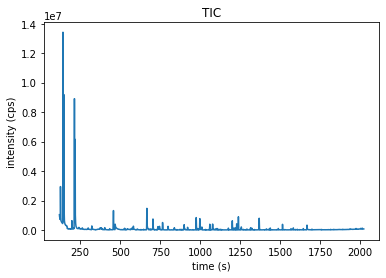

In [42]:
import matplotlib.pyplot as plt
# plot retention times and intensities and add labels
plt.plot(retention_times, intensities)

plt.title('TIC')
plt.xlabel('time (s)')
plt.ylabel('intensity (cps)')

plt.show()

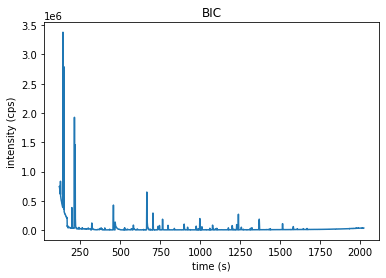

In [43]:
import matplotlib.pyplot as plt
# plot retention times and intensities and add labels
plt.plot(retention_times, intensities_max)

plt.title('BIC')
plt.xlabel('time (s)')
plt.ylabel('intensity (cps)')

plt.show()

In [44]:
import pandas as pd

df = pd.read_csv('MSHUB-GC-9532209f-download_feature_table-main.csv')
df.head()

,row ID,row m/z,row retention time,controle_Aflavus_2.CDF Peak area,controle_Aflavus_3.CDF Peak area,controle_Aflavus_4.CDF Peak area,controle_Aflavus_1.CDF Peak area,controle_ABJa3_2.CDF Peak area,controle_ABJa3_4.CDF Peak area,controle_ABJa3_3.CDF Peak area,...,co_cultivo_Aflavus_BJA3_2.CDF Peak area,co_cultivo_Aflavus_BJA3_1.CDF Peak area,co_cultivo_Aflavus_DH5a_1.CDF Peak area,co_cultivo_Aflavus_DH5a_3.CDF Peak area,co_cultivo_Aflavus_DH5a_4.CDF Peak area,co_cultivo_Aflavus_DH5a_2.CDF Peak area,co_cultivo_Aflavus_MCal1_3.CDF Peak area,co_cultivo_Aflavus_MCal1_4.CDF Peak area,co_cultivo_Aflavus_MCal1_2.CDF Peak area,co_cultivo_Aflavus_MCal1_1.CDF Peak area
0,1,0,2.08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7823.242810,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,2.700281e+04,0.000000e+00,0.000000,0.0,892.487112,0.000000
1,2,0,2.08,1.246410e+04,0.000000e+00,0.000000,0.000000e+00,126460.139533,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,196408.063053,0.000000
2,3,0,2.12,8.040506e+06,1.273005e+04,0.000000,3.214185e+06,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,82801.017909,6.274140e+03,0.000000e+00,0.000000,0.0,0.000000,0.000000
3,4,0,2.14,0.000000e+00,2.557433e+06,155825.868078,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,1.063113e+06,0.000000,3.807293e+05,0.000000e+00,102237.785589,0.0,426703.169875,171004.376835
4,5,0,2.14,0.000000e+00,0.000000e+00,8086.885396,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,1.799902e+06,1.491910e+06,0.000000,0.0,0.000000,584.877727


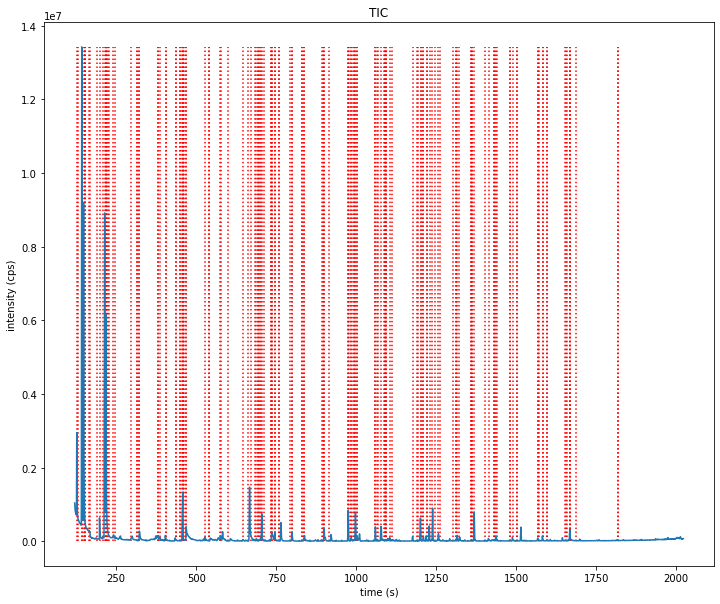

In [51]:
import matplotlib.pyplot as plt
# plot retention times and intensities and add labels
plt.figure(figsize=(12,10))
plt.plot(retention_times, intensities)

for i in df.index:
  if df.loc[i, 'controle_Aflavus_1.CDF Peak area']>0:
    plt.vlines(df.loc[i, 'row retention time']*60, 
               ymin=min(intensities), ymax=max(intensities), 
               colors='r', linestyles='dotted')
plt.title('TIC')
plt.xlabel('time (s)')
plt.ylabel('intensity (cps)')

plt.show()